In [4]:
# get the code
import sys
import os
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
sys.path.append('../code')

# import package functions
from script_utils_CNV import get_CNVconfig, show_output
from plot import plot_cov
from script_utils_CNV import show_output
from rollingCov import rolling_coverage
from combineCNV import filter_cov


# HOME
home = '/Users/mahtin'
home = '/Users/martinscience'

# standard paths
static = os.path.join(home, "Dropbox/Icke/Work/static")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
PON_path = os.path.join(static, "PON/HAEv7_hg38_NovaSeq")
 
cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")
plot_path = os.path.join(cnvdata, "plot")
fig_path = os.path.join(cnvdata, "figures")

### get the config
+ use the get_CNVconfig util function to update the general configs with the appropriate paths

In [7]:
path_config = dict(
        mawk_path="../shell",
        cov_path=os.path.join(output_path, "pile2CNV"),   # path containing rawcov.gz files for this sample
        snp_path=os.path.join(output_path, "pile2CNV"),   # path containing snp files for this sample
        bed_file=os.path.join(static, "bed_files/SureSelect/hg38/SS_HAEv7_hg38_Padded.bed"),
        genome_split_path=os.path.join(static, "genome/gatk/hg38/split"),
        gc_split_path=os.path.join(static, "genome/gatk/hg38/split"),
        genmap_split_path=os.path.join(static, "annotation/genmap/hg38/split"),
        PON_path = PON_path,
    )
CNVconfig = get_CNVconfig(
    "../config/config_CNV.yaml", 
    local_config=path_config)
CNVconfig

{'pileup': {'MAPQ': 20, 'Q': 25},
 'hetSNP': {'normalVAF': [0.2, 0.8], 'minDepth': 15},
 'coverage': {'minCov': 0,
  'minPONcov': 50,
  'maxPONstd': 50,
  'GCnormalize': True},
 'PONcoverage': {'minCov': 0, 'minVAF': 0.05, 'minDepth': 50, 'stdFactor': 2},
 'filter': {'cov': {'GCrange': [0.2, 0.8], 'minPONcov': 30, 'maxPONstd': 15},
  'snp': {'maxPONVAF': 0.25, 'minPONDepth': 800}},
 'rolling': {'cov': {'normalize': False,
   'debug': True,
   'diff_exp': 4,
   'ddof': 0,
   'LLH': {'center_range': [-0.5, 0.5], 'sigma_factor': 0.9},
   'data': {'log2ratio': {'mean': 250}, 'covLLH': {'sum': 250}}},
  'snp': {'normalize': False,
   'debug': True,
   'diff_exp': 4,
   'ddof': 0,
   'LLH': {'center_range': [-0.5, 0.5], 'sigma_factor': 0.9},
   'data': {'log2ratio': {'mean': 250}, 'covLLH': {'sum': 250}}}},
 'mawk_path': '../shell',
 'cov_path': '/Users/martinscience/Dropbox/Icke/Work/somVar/tooldata/myCNVdata/output/pile2CNV',
 'snp_path': '/Users/martinscience/Dropbox/Icke/Work/somVar/tool

### load coverage data and visualize

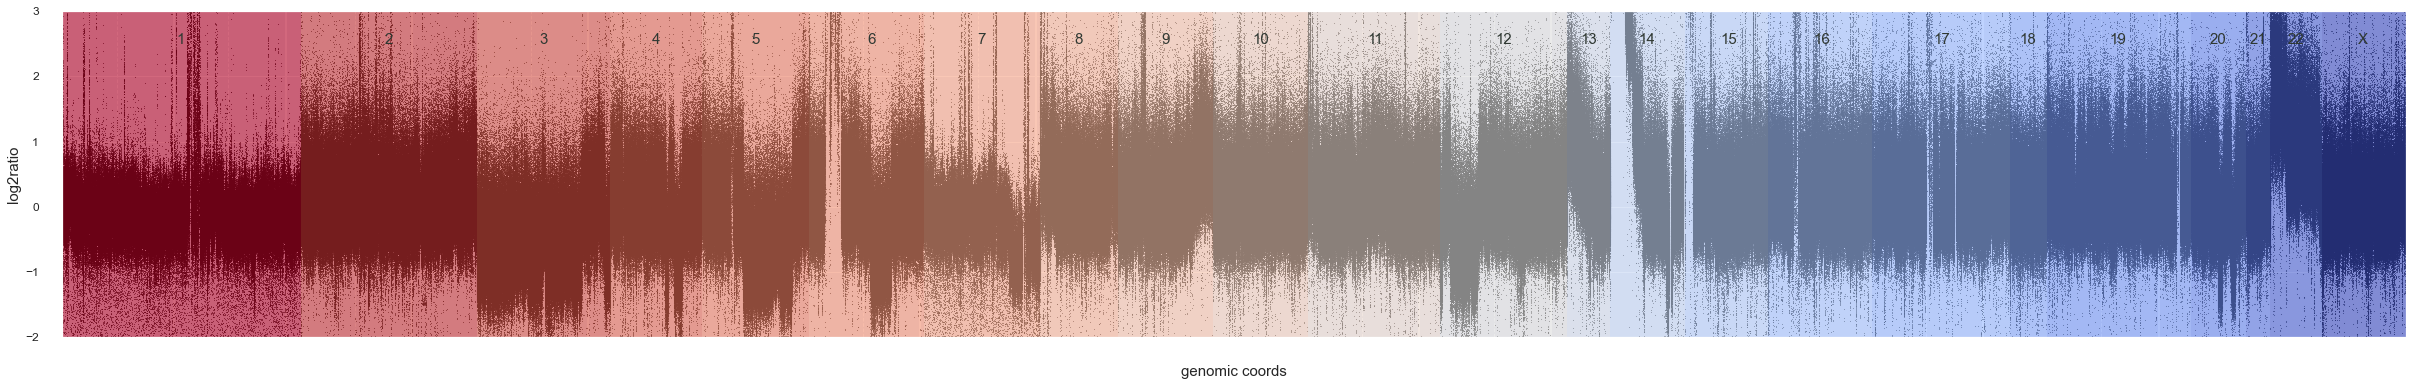

In [5]:
sample = "03_A-B"
cov_rawdf = pd.read_csv(os.path.join(output_path, f"cov/{sample}.cov.gz"), sep="\t", compression="gzip")


fig_params = dict(
    figsize=(42,6),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(-2,3)
)
log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio2',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=.5,
            alpha=.7
        ))



fig, ax, _, chrom_df = plot_cov(cov_rawdf, plots=[log2], chroms='all', region='', **fig_params)
# fig.savefig(os.path.join(cnvdata, "figures/03_GC_cov.jpeg"))
# cov_noGC_df = pd.read_csv(os.path.join(output_path, f"cov/{sample}.noGC.cov.gz"), sep="\t", compression="gzip")
# fig.savefig(os.path.join(cnvdata, "figures/03_GC_cov.jpeg"))

## filter coverage data

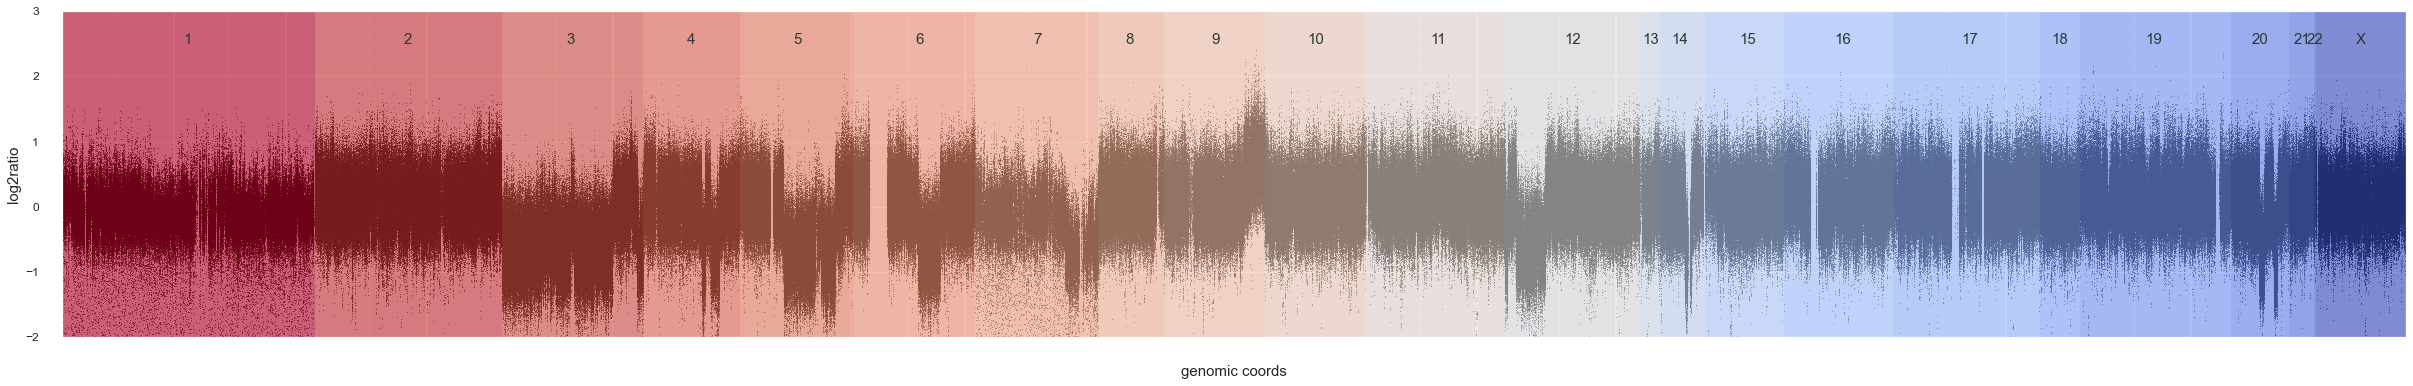

In [9]:
CNVconfig = get_CNVconfig(
    "../config/config_CNV.yaml", 
    local_config=path_config)

cov_df = filter_cov(cov_rawdf, config=CNVconfig)

fig, ax, _, chrom_df = plot_cov(cov_df, plots=[log2], chroms='all', region='', **fig_params)

## run the code

In [3]:
from rollingCov import rolling_coverage
roll_df = rolling_coverage(cov_df, config=CNVconfig)

log2mean = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'ascatter']
        data='log2ratio2_mean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )

llh = dict(
        title='llh',
        plot_type='line',   # ['line', 'scatter']
        data='covLLH2_sum',
        plot_args=dict(
            linewidth=1,
            color='blue',
            alpha=.7
        )
    )

llhdiff = dict(
        title='llh',
        plot_type='line',   # ['line', 'scatter']
        data='covLLH2_sumDiff',
        plot_args=dict(
            linewidth=1,
            color='green',
            alpha=.7
        )
    )

log2L = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratio2_meanL',
        plot_args=dict(
            linewidth=1,
            color='white',
            alpha=.7
        ))

log2R = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratio2_meanR',
        plot_args=dict(
            linewidth=1,
            color='black',
            alpha=.7
        ))
r1 = 'chr20:47Mb-57Mb'
r2 = 'chr4:110Mb-140Mb'
fig, _, _, _ = plot_cov(roll_df, plots=[log2,log2mean, llh, llhdiff], chroms='all', region=r1, **fig_params)

NameError: name 'CNVconfig' is not defined

## Step by step
+ make a copy for computation

In [ ]:
df = cov_df.loc[:,['Chr', 'Pos', 'ExonPos', 'FullExonPos', 'Cov1', 'log2ratio1', 'Cov2', 'log2ratio2']].copy()
df[:5]

### assumption: 
+ log2ratio is normal-distributed around mean value:
+ log-likelihood should be far below average at CNV areas
### compute the llh for center mass for entire sample
+ get the global mean
+ compute loglikelihood
+ rolling sum for chromosome

In [ ]:
import numpy.random as rnd

col = "log2ratio1"
sigma = df.query(f'-0.5 < {col} < .5')[col].std() * .9
# get the mean of the center band
mean = df.query(f'-0.5 < {col} < .5')[col].mean()
print("sigma:", sigma)
print("mean:", mean)
def llh(data, mean, sigma):
    s = np.sqrt(2 * np.pi) * sigma
    return np.exp((data - mean)**2 / (-2*(sigma**2))) / s

r = np.linspace(-2,2,10000)
fig1, ax = plt.subplots(figsize=(10,4))
_ = ax.scatter(r, llh(r, mean, sigma), s=.5, alpha=0.5)
_ = ax.scatter(df[col], rnd.random(len(df.index))*4, s=.01, alpha=.1)
_ = ax.set_xlim(-1.5,2)
fig1.savefig(os.path.join(plot_path, f"{sample}.log2gauss.jpg"))

In [ ]:
def llh(data, mean=0.5, sigma=2):
    '''
    compute llh for one col
    '''
    s = np.sqrt(2 * np.pi) * sigma
    return np.exp((data - mean)**2 / (-2*(sigma**2))) / s


def compute_covLLH_col(df, log_col, params={}):
    """
    computes the local log-likelihood of belonging to the center gaussian for specified log_column
    """

    cols = list(df.columns)

    min_log2ratio, max_log2ratio = params["center_range"]
    # get the sigma and mean of the center band log2ratio
    center_logs = df.query(f"@min_log2ratio < {log_col} < @max_log2ratio")[log_col]
    sigma = center_logs.std() * params["sigma_factor"]
    mean = center_logs.mean()
    show_output(
        f"Computing log-likelihood of {log_col} belonging to center gaussian [mean:{round(mean, 3)}, sigma:{round(sigma,3)}]"
    )
    llh_col = log_col.replace("log2ratio", "covLLH")
    df.loc[:, llh_col] = llh(df[log_col], mean=mean, sigma=sigma)
    # get col index of log_col for adjacent inserting of llh_col

    insert_index = df.columns.get_loc(log_col) + 1
    df = df.loc[:, cols[:insert_index] + [llh_col] + cols[insert_index:]]
    return df


def compute_covLLH(df, config={}):
    '''
    computes the local log-likelihood of belonging to the center gaussian
    '''
    
    for col in df.columns:
        if col.startswith("log2ratio"):
            df = compute_covLLH_col(df, col, params=config['rolling']['cov']['LLH'])
    
    return df

In [ ]:
llh_df = compute_covLLH(df, config=CNVconfig)
llh_df

## rolling window for log2ratio and llh
+ compute the mean for log2ratio

In [ ]:
def interpolate(df, data_col, ref_col='FullExonPos', expand_limit=20):
    '''
    interpolates missing values in data_col using linear interpolation based on ref_col
    '''
    cols = list(df.columns)
    # set FullExonPos as index for the interpolation method to work on proper intervals
    df = df.reset_index(drop=False).set_index(ref_col, drop=False)
    df.loc[:,data_col] = df[data_col].interpolate(method='values', limit=expand_limit, limit_direction='both')
    return df.set_index('index')[cols]


def normalize_df(df, col):
    '''
    normalize a column of a df
    '''
    _min = df[col].min()
    _max = df[col].max()
    df.loc[:, col] = (df[col] - _min) / (_max - _min)
    return df


def one_col_rolling(df, col, aggr="mean", window_size=200, roll_config={}):
    """
    performs rolling computation of <agg> on data column <col> with given window size
    the aggregation can be a:
        - callable taking df[col] as argument and returning a scalar
            column name will be taken from function name (stripping underscores)
        - string expression understood by the agg-function of the pandas.groupby API
            column name will be composed of col + aggr
    computation is performed on a left and right rolling window
    missing margins are filled by the counterpart window function
    a diff column is included ()
    """
    # UNPACK PARAMS
    normalize = roll_config["normalize"]
    debug = roll_config["debug"]
    diff_exp = roll_config.get("diffexp", 2)
    ddof = roll_config.get("ddof", 0)

    # save org cols
    cols = list(df.columns)

    # ###### ROLLING LEFT
    # check if aggr is a function
    if callable(aggr):
        if debug:
            show_output(f"Aggregating custom function {aggr.__name__}")
        df.loc[:, "L"] = df[col].rolling(window_size).apply(aggr)
        # pass the function name for ensuing column naming
        col_name = aggr.__name__
    else:
        # get the right computation by passing aggr to .agg()
        # only this allows passing methods as string
        df.loc[:, "L"] = df[col].rolling(window_size).agg(aggr, ddof=ddof)
        col_name = col + "_"+  aggr

    # ###### ROLLING RIGHT
    # rolling right by shifting the L column
    df.loc[:, "R"] = df.shift(-window_size + 1)["L"]

    # ###### DIFFING
    diff_name = col_name + "Diff"

    added_cols = [col_name, diff_name]
    if debug:
        added_cols += [f"{col_name}L", f"{col_name}R"]
    # skips interpolation if value == 0
    if interpolate:
        # interpolate missing values
        for c in ["L", "R"]:
            df = interpolate(df, c, expand_limit=10)
    # fill the margins
    try:
        L_margin = df["L"].first_valid_index()
        df.loc[:L_margin, "L"] = df["R"]
        R_margin = df["R"].last_valid_index() + 1
        df.loc[R_margin:, "R"] = df["L"]
    except Exception as e:
        show_output(
            f"An error occurred attempting to fill the margins! {e}", color="warning"
        )

    # get the Diff
    df.loc[:, diff_name] = np.abs(df["R"] - df["L"])
    # normalize to max
    df.loc[:, diff_name] = df[diff_name] / df[diff_name].max()
    # here, contribution of L and R is controlled by diff value
    df.loc[:, col_name] = df["R"] * df[diff_name] + df["L"] * (1 - df[diff_name])

    if normalize:
        df = normalize_df(df, col_name)
        if debug:
            for c in ["L", "R"]:
                df = normalize(df, c)

    # steepen the diff
    df.loc[:, diff_name] = df[diff_name] ** diff_exp

    if debug:
        # specify col names of L and R
        df = df.rename(columns=dict(L=f"{col_name}L", R=f"{col_name}R"))

    # insert the cols
    # get col index of cov_col for inserting log_col
    insert_index = df.columns.get_loc(col) + 1
    out_cols = cols[:insert_index] + added_cols + cols[insert_index:]

    # reduce to the right columns
    return df.loc[:, out_cols]

In [ ]:
def rolling_data(df, data_params={}, roll_config={}):
    '''
    cycles through the data params (rolling_data object from config dict)
    and performs rolling computations for these params
    '''
    # now do global normalization for sum aggregations:
    # cycle through the data_types
    for data_type in data_params.keys():
        # cycle through the cols for that data_type
        for data_col in df.columns:
            if not data_col.startswith(data_type):
                continue
            # cycle through the aggs for that data_type
            for agg in data_params[data_type].keys():
                # get params
                window_size = data_params[data_type][agg]
                show_output(f"Computing rolling window for {agg} of {data_col} with window size {window_size}")
                # run the rolling window
                df = one_col_rolling(
                     df, 
                     col=data_col,
                     aggr=agg,
                     window_size=window_size,
                     roll_config=roll_config
                 )
                
            
            #### Normalization
            # only do normalization for sum aggregations
            if not agg == "sum":
                continue
            show_output(f"Normalizing {data_col} {agg}")
            # get the columns for normalization
            col_name = data_col + "_" + agg
            cols = [col_name]
            if roll_config['debug']:
                cols += [f'{col_name}L', f'{col_name}R']
            for c in cols:
                _min = df[c].min()
                _max = df[c].max()
                df.loc[:, c] = (df[c] - _min) / (_max - _min)
    return df


def rolling_coverage(cov_df, config={}):
    '''
    cycle through the chroms and perform rolling window computations of data set in config
    '''

    # split the params dict for easier access
    cc = config['rolling']['cov']
    data_params = cc['data']
    
    # perform llh computation for coverage if needed
    if "covLLH" in data_params:
        cov_df = compute_covLLH(cov_df, config=config)
        
    cov_df = rolling_data(cov_df, data_params=data_params, roll_config=cc)
                   
    return cov_df

In [ ]:
df = df.drop(['L', 'R'], axis=1)
CNVconfig = get_CNVconfig(
    "../config/config_CNV.yaml", 
    local_config=path_config)

roll_df = rolling_coverage(df, config=CNVconfig)
roll_df[:10]

### visualize

In [ ]:
fig, _, _, _ = plot_cov(roll_df, plots=[log2,log2mean], chroms='all', region='', **fig_params)

In [ ]:
r1 = 'chr20:47Mb-57Mb'
r2 = 'chr4:110Mb-140Mb'
fig, _, _, _ = plot_cov(roll_df, plots=[log2,log2mean, llh, llhdiff], chroms='all', region=r1, **fig_params)

In [ ]:


# chroms = ['chr3', 'chr4', 'chr5', 'chr6', 'chr8', 'chr9', 'chr20']

fig, _, _, _ = plot_cov(roll_df, plots=[log2,log2mean], chroms='all', region='', **fig_params)

## LEGACY CODE
+ uses rolling of filter_df and interpolation into full_df

In [ ]:
def one_col_rolling(df, df_filter, col, aggr, window_size=200, expand_limit=20, normalize=False, debug=False, diff_exp=2, ddof=0):
    '''
    performs rolling computation of <agg> on data column <col> with given window size
    the aggregation can be a:
        - callable taking df[col] as argument and returning a scalar
            column name will be taken from function name (stripping underscores)
        - string expression understood by the agg-function of the pandas.groupby API
            column name will be composed of col + aggr
    computation is performed on a left and right rolling window
    missing margins are filled by the counterpart window function
    a diff column is included ()
    '''

    org_cols = list(df.columns)
    # rolling left
    # check if aggr is a function
    if callable(aggr):
        if debug:
            show_output(f'Aggregating custom function {aggr.__name__}')
        df.loc[:, 'L'] = df_filter[col].rolling(window_size).apply(aggr)
        # pass the function name for ensuing column naming
        col_name = aggr.__name__.replace('_', '')
    else:
        # get the right computation by passing aggr to .agg()
        # only this allows passing methods as string
        df.loc[:, 'L'] = df_filter[col].rolling(window_size).agg(aggr, ddof=ddof)
        col_name = col + aggr
        
    # rolling right by shifting the L column
    df.loc[:, 'R'] = df.shift(-window_size + 1)['L']

    diff_name = col_name + "Diff"
    new_cols = org_cols + [col_name, diff_name]
    if debug:
        new_cols += [f'{col_name}L', f'{col_name}R']
    # skips interpolation if value == 0
    if interpolate:
        # interpolate missing values
        for c in ['L', 'R']:
            df = interpolate(df, c, expand_limit=expand_limit)
    # fill the margins
    L_margin = df['L'].first_valid_index()
    df.loc[:L_margin, 'L'] = df['R']
    R_margin = df['R'].last_valid_index() + 1
    df.loc[R_margin:, 'R'] = df['L']

    # get the Diff
    df.loc[:, diff_name] = np.abs(df['R'] - df['L'])
    # normalize to max
    df.loc[:, diff_name] = df[diff_name] / df[diff_name].max()
    # here, contribution of L and R is controlled by diff value
    df.loc[:, col_name] = df['R'] * \
        df[diff_name] + df['L'] * (1 - df[diff_name])
    
    if normalize:
        df = normalize_df(df, col_name)
        if debug:
            for c in ['L', 'R']:
                df = normalize(df, c)
    
    # square the diff
    df.loc[:, diff_name] = df[diff_name] ** diff_exp

    if debug:
        # specify col names of L and R
        df = df.rename(columns=dict(L=f'{col_name}L', R=f'{col_name}R'))

    # reduce to the right columns
    return df[new_cols]


def rolling_data(df, filter_df, expand=0.25, ddof=0, debug=False, data_params={}):
    '''
    cycles through the data params (rolling_data object from config dict)
    and performs rolling computations for these params
    '''
    # now do global normalization for sum aggregations:
    # cycle through rolling_data
    for data_col in data_params.keys():
        for agg in data_params[data_col].keys():
            # cycle through the chroms
            chrom_dfs = []
            for chrom in df['Chr'].unique():
                # get the chrom_dfs
                chrom_df = df.query('Chr == @chrom').sort_values('FullExonPos')
                filter_chrom_df = filter_df.query('Chr == @chrom').sort_values('FullExonPos')
                window_size = data_params[data_col][agg]
                expand_limit = int(expand * window_size)
                # show_output(f"Computing rolling window for {agg} of {data_col} with window size {window_size} on {chrom}")
                chrom_df = one_col_rolling(chrom_df, filter_chrom_df, data_col, agg, window_size=window_size,
                                           expand_limit=expand_limit, ddof=ddof)            
                chrom_dfs.append(chrom_df)
            # combine the chrom_dfs
            df = pd.concat(chrom_dfs).sort_values('FullExonPos')
            
            #### Normalization
            # only do normalization for sum aggregations
            if not agg == "sum":
                continue
            show_output(f"Normalizing {data_col} {agg}")
            # get the columns for normalization
            col_name = data_col + agg
            cols = [col_name]
            if debug:
                cols += [f'{col_name}L', f'{col_name}R']
            for c in cols:
                _min = df[c].min()
                _max = df[c].max()
                df.loc[:, c] = (df[c] - _min) / (_max - _min)
    return df


def rolling_coverage(cov_df, config):
    '''
    cycle through the chroms and perform rolling window computations of data set in config
    '''

    # split the params dict for easier access
    params = config[]['cov']
    filter_params = params['filter']
    data_params = params['rolling_data']
    
    # get the params for filtering
    min_cov = filter_params['min_cov']
    min_PON_cov = filter_params['min_PON_cov']
    max_PON_std = filter_params['max_PON_std']
    
    cov_df = cov_df.sort_values('FullExonPos')
    filter_df = cov_df.query(
            'Coverage >= @min_cov and PONmeanCov >= @min_PON_cov and PONstd < @max_PON_std')
    
    cov_df = rolling_data(cov_df, filter_df, expand=params['expand'], ddof=config['ddof'], debug=config['debug'], data_params=data_params)
                   
    return cov_df